# Linear Regression from Scratch
Here we implement single-variable linear regression **without** using machine learning libraries. The idea is to fit a line `y = m x + b` that minimises squared errors between predictions and real exam scores. We use closed-form formulas to compute the slope `m` and intercept `b`, then evaluate the model with **Mean Squared Error (MSE)** and **R^2 Score**.

Loaded 200 records
   hours_studied  exam_score
0            8.0        30.2
1            1.3        25.0
2            4.0        35.8
3            3.5        34.0
4            9.1        40.3

Learned parameters (original scale):
Slope (hours_studied): 1.6341
Intercept: 23.6184

📊 Evaluation Metrics
Mean Squared Error (MSE): 18.1937
R² Score: 0.6033


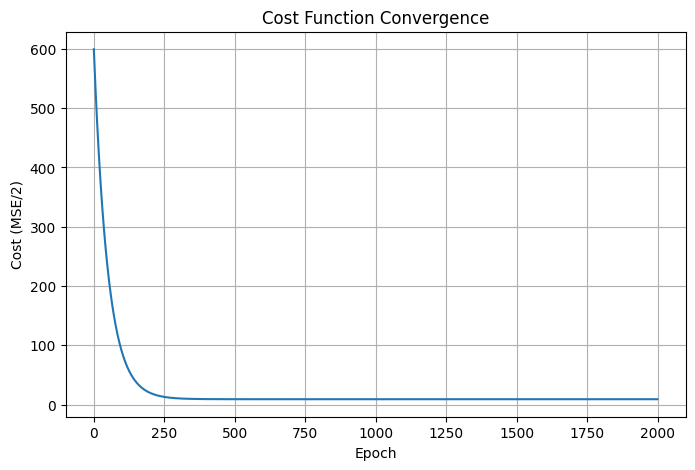

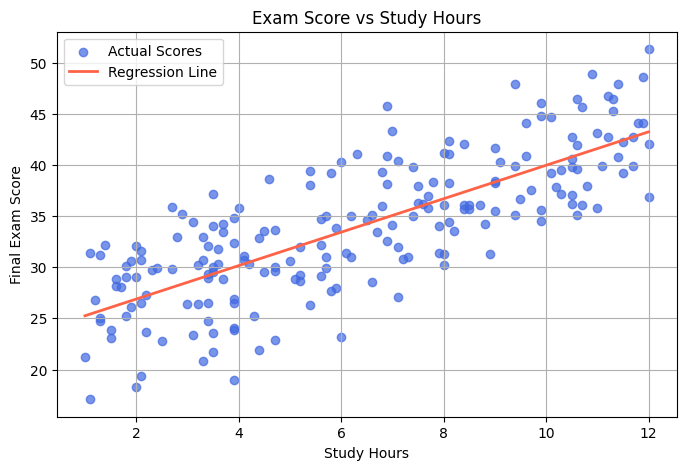

In [1]:
# ============================================================
# Linear Regression (From Scratch)
# Predict Final Exam Score from Study Hours
# Metrics: Mean Squared Error (MSE) and R² Score
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Load dataset
# ------------------------------------------------------------
file_path = "./datasets/student_exam_scores_12_13.csv"
df = pd.read_csv(file_path)

# Keep only the columns we need and drop missing values
df = df[["hours_studied", "exam_score"]].dropna()

X_raw = df["hours_studied"].values.astype(float)
y = df["exam_score"].values.astype(float)

print(f"Loaded {len(df)} records")
print(df.head())

# ------------------------------------------------------------
# 2️⃣ Feature scaling (manual z-score)
# ------------------------------------------------------------
mean_x = X_raw.mean()
std_x = X_raw.std()
std_x = std_x if std_x != 0 else 1.0  # avoid division by zero

X = (X_raw - mean_x) / std_x  # scaled feature

# ------------------------------------------------------------
# 3️⃣ Hyperparameters & storage
# ------------------------------------------------------------
alpha = 0.01   # learning rate
epochs = 2000  # number of gradient descent iterations

m = 0.0  # slope in scaled space
c = 0.0  # intercept
n = len(y)
cost_history = []

# ------------------------------------------------------------
# 4️⃣ Gradient Descent Training
# ------------------------------------------------------------
for _ in range(epochs):
    y_pred = m * X + c
    error = y_pred - y

    cost = (1 / (2 * n)) * np.sum(error ** 2)
    cost_history.append(cost)

    dm = (1 / n) * np.sum(error * X)
    dc = (1 / n) * np.sum(error)

    m -= alpha * dm
    c -= alpha * dc

# Convert slope/intercept back to original units for interpretation
original_slope = m / std_x
original_intercept = c - (m * mean_x / std_x)

print("\nLearned parameters (original scale):")
print(f"Slope (hours_studied): {original_slope:.4f}")
print(f"Intercept: {original_intercept:.4f}")

# ------------------------------------------------------------
# 5️⃣ Predictions & Metrics
# ------------------------------------------------------------
y_pred_final = m * X + c  # still valid because X is scaled

mse = np.mean((y_pred_final - y) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred_final) ** 2)
r2 = 1 - (ss_residual / ss_total)

print("\n📊 Evaluation Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ------------------------------------------------------------
# 6️⃣ Visualisations
# ------------------------------------------------------------
# Cost curve
plt.figure(figsize=(8, 5))
plt.plot(cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE/2)")
plt.grid(True)
plt.show()

# Regression line vs actual data (use original scale)
plt.figure(figsize=(8, 5))
plt.scatter(X_raw, y, color="royalblue", alpha=0.7, label="Actual Scores")
line_x = np.linspace(X_raw.min(), X_raw.max(), 100)
line_y = original_slope * line_x + original_intercept
plt.plot(line_x, line_y, color="tomato", linewidth=2, label="Regression Line")
plt.title("Exam Score vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Final Exam Score")
plt.legend()
plt.grid(True)
plt.show()
